In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
loan_df = pd.read_csv("loan.csv",low_memory=False)

In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan = loan_df

In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
missing_columns = loan.columns[loan.isna().sum()/len(loan.index) *100 > 90]

In [9]:
len(missing_columns)

56

In [10]:
loan = loan.drop(missing_columns, axis=1)

In [11]:
loan.shape

(39717, 55)

In [12]:
loan.isna().sum()/len(loan.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
loan[['desc',"mths_since_last_delinq"]]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


In [14]:
loan = loan.drop(['mths_since_last_delinq','desc'],axis=1)

In [15]:
loan.isna().sum()/len(loan.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [18]:
loan['int_rate'] = loan['int_rate'].str.replace("%","").astype(float)

In [19]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
loan['emp_length'].isna().sum()

1075

In [21]:
emp_len_ms_va = loan[loan['emp_length'].isnull()].index

In [22]:
loan.shape

(39717, 53)

In [23]:
39717-1075

38642

In [24]:
loan = loan[~loan['emp_length'].isnull()]

In [25]:
import re

In [26]:
loan["emp_length"] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [27]:
loan['emp_length'] = loan['emp_length'].astype(int)

In [28]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [29]:
# i want to take "fully paid" and "chared off"

In [30]:
loan = loan[loan['loan_status']!="Current"]

In [31]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [32]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [33]:
from datetime import datetime

In [34]:
### feature engineering

In [35]:
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [36]:
loan["isd_month"] = loan['issue_d'].apply(lambda x:x.month)
loan["isd_year"] = loan['issue_d'].apply(lambda x:x.year)

In [37]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [38]:
loan['revol_util'] = loan['revol_util'].str.replace("%","").astype(float)

In [39]:
loan['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [40]:
loan['pymnt_plan'].unique()      # not needed

array(['n'], dtype=object)

In [41]:
loan['earliest_cr_line']     #### not needed 

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 37544, dtype: object

In [42]:
loan['initial_list_status'].unique()    ### not needed

array(['f'], dtype=object)

In [43]:
loan['out_prncp_inv'].unique()        #### not needed

array([0.])

In [44]:
loan['last_pymnt_d']     ### date time # year and # month

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
5        Jan-15
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 37544, dtype: object

In [45]:
loan['collections_12_mths_ex_med'].unique()     ### not needed

array([ 0., nan])

In [46]:
loan['policy_code'].unique()    ### not needed

array([1], dtype=int64)

In [47]:
loan['application_type'].unique()   ### not needed

array(['INDIVIDUAL'], dtype=object)

In [48]:
loan['acc_now_delinq'].unique()    ### not needed

array([0], dtype=int64)

In [49]:
loan['delinq_amnt'].unique()     #### not needed

array([0], dtype=int64)

In [50]:
### just try ### write a function for identifying the unique value columns and extract them

In [51]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [52]:
loan['tax_liens'].unique()     ### not needed

array([ 0., nan])

In [53]:
req_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
     'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens', 'isd_month', 'isd_year',
            'loan_status']

In [54]:
loan[req_cols].to_csv("loan-processed.csv",index=False)

In [55]:
new_data = pd.read_csv("loan-processed.csv")

In [56]:
new_data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

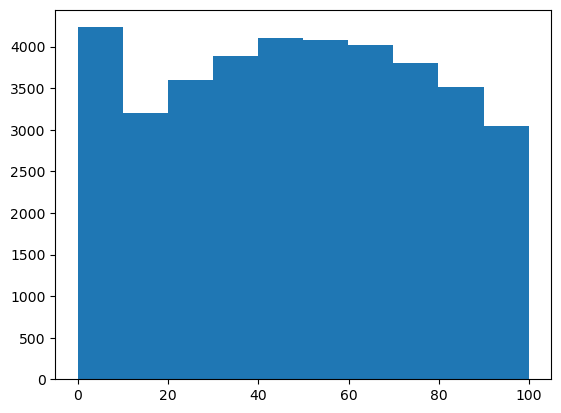

In [57]:
plt.hist(new_data['revol_util'])
plt.show()

In [58]:
median_ru = new_data['revol_util'].median()
new_data['revol_util'] = new_data['revol_util'].fillna(median_ru)

In [59]:
new_data['revol_util'].isna().sum()

0

In [60]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [61]:
new_data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies       697
tax_liens                   39
isd_month                    0
isd_year

In [62]:
new_data['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [63]:
new_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [64]:
new_data['pub_rec_bankruptcies'] = new_data['pub_rec_bankruptcies'].fillna(0)

In [65]:
new_data['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [66]:
new_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [67]:
new_data.isna().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
tax_liens                  39
isd_month                   0
isd_year                    0
loan_statu

In [68]:
new_data['tax_liens'].unique()

array([ 0., nan])

In [69]:
new_data = new_data.drop("tax_liens",axis=1)

In [70]:
new_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [72]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [73]:
new_data["term"] = new_data['term'].map({' 36 months':36,' 60 months':60})

In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [75]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data["grade"] = le.fit_transform(new_data['grade'])

In [77]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [78]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [79]:
new_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [80]:
new_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [81]:
new_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [82]:
new_data.shape

(37544, 33)

In [83]:
x = new_data.drop("loan_status",axis=1)
y = new_data['loan_status']

In [84]:
x['grade']

0        1
1        2
2        2
3        2
4        0
        ..
37539    0
37540    2
37541    0
37542    0
37543    4
Name: grade, Length: 37544, dtype: int32

In [85]:
x = pd.get_dummies(x)

In [86]:

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=134)

### decision trees, bagging classifier, random forest

In [87]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[1093,   30],
       [  28, 6358]], dtype=int64)

In [89]:
accuracy_score(y_test, y_pred)

0.9922759355440138

In [90]:
# f1_score(y_test, y_pred)

In [91]:
base = DecisionTreeClassifier()
bg = BaggingClassifier(base_estimator=base , n_estimators=50)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)

In [92]:
accuracy_score(y_test, y_pred)

0.9954721001464909

In [93]:
confusion_matrix(y_test, y_pred)

array([[1089,   34],
       [   0, 6386]], dtype=int64)

In [94]:
# f1_score(y_test, y_pred)

In [95]:
rf = RandomForestClassifier(max_depth = 16, n_estimators=150)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [96]:
confusion_matrix(y_test, y_pred)

array([[1075,   48],
       [   0, 6386]], dtype=int64)

### k fold cross validation technique

Check the cross validated score on decision trees, bagging classifier, random forest.

In [97]:
#cross validated score random forest
cv_results=cross_val_score(rf,x,y,cv=5,scoring="accuracy")

In [98]:
cv_results.mean()

0.9934741673515134

In [99]:
#cross validated score on decision trees
cv_results=cross_val_score(dt,x,y,cv=5,scoring="accuracy")

In [100]:
cv_results.mean()

0.988093446095905

In [101]:
# cross validated score on bagging classifier
cv_results=cross_val_score(bg,x,y,cv=5,scoring="accuracy")

In [102]:
cv_results.mean()

0.9953120223056076

In [103]:
x

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,36,10.65,162.87,1,10,24000.0,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,2,1,30000.0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,2,10,12252.0,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,36,13.49,339.31,2,10,49200.0,20.00,...,0,0,0,0,0,1,0,0,0,0
4,5000,5000,5000.0,36,7.90,156.46,0,3,36000.0,11.20,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,2500,2500,1075.0,36,8.07,78.42,0,4,110000.0,11.33,...,1,0,0,0,0,0,0,0,0,0
37540,8500,8500,875.0,36,10.28,275.38,2,3,18000.0,6.40,...,0,0,0,0,0,0,0,0,0,0
37541,5000,5000,1325.0,36,8.07,156.84,0,1,100000.0,2.30,...,0,0,0,0,0,0,0,0,0,0
37542,5000,5000,650.0,36,7.43,155.38,0,1,200000.0,3.72,...,0,0,0,0,0,1,0,0,0,0


In [104]:
new_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,37544.0,11119.33,7354.10,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt,37544.0,10853.56,7096.32,500.00,5400.00,9600.00,15000.00,35000.00
funded_amnt_inv,37544.0,10280.50,7034.12,0.00,5000.00,8850.00,14075.00,35000.00
term,37544.0,41.92,10.34,36.00,36.00,36.00,36.00,60.00
int_rate,37544.0,11.96,3.68,5.42,8.94,11.83,14.42,24.40
installment,37544.0,324.65,208.90,15.69,167.37,280.00,428.94,1305.19
grade,37544.0,1.56,1.38,0.00,0.00,1.00,2.00,6.00
emp_length,37544.0,5.06,3.40,1.00,2.00,4.00,9.00,10.00
annual_inc,37544.0,69407.08,64676.98,4000.00,41000.00,60000.00,83000.00,6000000.00
dti,37544.0,13.28,6.66,0.00,8.16,13.38,18.55,29.99


In [105]:
x.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',

In [106]:
new_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment', 'grade', 'emp_length', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000
mean,11119.329986,10853.560489,10280.495739,41.917537,11.963319,324.650164,1.563419,5.061048,6.940708e+04,13.284186
std,7354.098954,7096.316776,7034.124211,10.344394,3.683012,208.901055,1.381968,3.401750,6.467698e+04,6.660551
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,1.000000,4.000000e+03,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.370000,0.000000,2.000000,4.100000e+04,8.160000
50%,10000.000000,9600.000000,8850.000000,36.000000,11.830000,280.000000,1.000000,4.000000,6.000000e+04,13.380000
75%,15000.000000,15000.000000,14075.000000,36.000000,14.420000,428.942500,2.000000,9.000000,8.300000e+04,18.550000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000,10.000000,6.000000e+06,29.990000


In [107]:
new_data[['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp',]].describe()

,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000
mean,0.147107,0.872390,9.298476,0.053724,13363.702562,48.862291,22.083875,11957.010792,11348.809823,9720.124658
std,0.493479,1.071003,4.396229,0.234622,15894.970643,28.323751,11.416494,8823.936817,8719.604728,7020.466734
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,0.000000,3693.000000,25.500000,13.000000,5565.271934,5074.037500,4552.150000
50%,0.000000,1.000000,9.000000,0.000000,8840.500000,49.300000,20.000000,9777.765034,9159.695000,8000.000000
75%,0.000000,1.000000,12.000000,0.000000,17009.000000,72.400000,29.000000,16243.811330,15442.962500,13263.315000
max,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000


In [108]:
new_data[['total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']].describe()

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000
mean,2137.018706,1.378980,98.488534,12.815757,2769.442228,0.041019
std,2395.346010,7.360282,704.389292,151.989005,4514.772596,0.199006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,655.317500,0.000000,0.000000,0.000000,220.820000,0.000000
50%,1321.210000,0.000000,0.000000,0.000000,578.540000,0.000000
75%,2697.102500,0.000000,0.000000,0.000000,3494.710000,0.000000
max,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


 Do the scaling and apply logisitc regression , KNN, svm

In [109]:
num_c=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment', 'annual_inc', 'revol_bal','total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.loc[:,num_c]=sc.fit_transform(x[num_c])

In [110]:
x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=134)

# logisitc regression , KNN, svm

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression(max_iter=1000, C=100)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
accuracy_score(y_test, y_pred)*100

99.25422825942204

In [115]:
confusion_matrix(y_test, y_pred)

array([[1077,   46],
       [  10, 6376]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 Charged Off       0.99      0.96      0.97      1123
  Fully Paid       0.99      1.00      1.00      6386

    accuracy                           0.99      7509
   macro avg       0.99      0.98      0.99      7509
weighted avg       0.99      0.99      0.99      7509



In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [119]:
accuracy_score(y_test, y_pred)*100

86.05673192169397

In [120]:
confusion_matrix(y_test, y_pred)

array([[  88, 1035],
       [  12, 6374]], dtype=int64)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 Charged Off       0.88      0.08      0.14      1123
  Fully Paid       0.86      1.00      0.92      6386

    accuracy                           0.86      7509
   macro avg       0.87      0.54      0.53      7509
weighted avg       0.86      0.86      0.81      7509



In [122]:
from sklearn.svm import SVC

In [123]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 Charged Off       1.00      0.96      0.98      1123
  Fully Paid       0.99      1.00      1.00      6386

    accuracy                           0.99      7509
   macro avg       1.00      0.98      0.99      7509
weighted avg       0.99      0.99      0.99      7509

